**simple linear regression**

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied

In [ ]:
#importing libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
data =pd.read_csv(url)
print("Data imported successfully")


Data imported successfully


In [ ]:
#first 5 rows
data.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
data.isnull==True #check if there any null value


False

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


**Visualizing the Data**

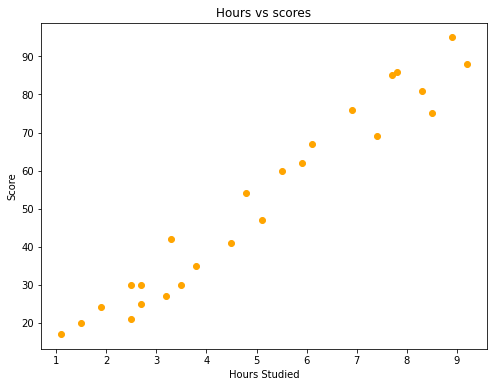

In [ ]:
#data.plot(x='Hours',y='Scores',style='o')

#plotting the description of scores 

plt.figure(figsize=(8,6))
plt.scatter(x,y,c="orange")
plt.title('Hours vs scores')
plt.xlabel('Hours Studied')
plt.ylabel('Score')
plt.show()

**Plot Regression Line**



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


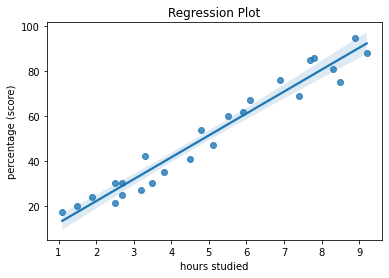

In [ ]:
#plot a linear relation between the hours studied and percentage score

sns.regplot(x,y)
plt.title('Regression Plot')
plt.xlabel('hours studied')
plt.ylabel('percentage (score)')
plt.show()

**Preparing the data**



In [ ]:
#divide the data into attributes(inputs) as x and labels(outputs) as y
x =data.iloc[:,:-1].values
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [ ]:
y =data.iloc[:,1].values
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

In [ ]:
#split data into training and testing set using scikit learn
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
print("training dataset shape",x_train.shape,x_test.shape)
print("testing dataset shape",y_train.shape,x_test.shape)

training dataset shape (20, 1) (5, 1)
testing dataset shape (20,) (5, 1)


**training the model**

In [ ]:
#Training the model with the training data then plot regression line
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)
print("Training complete")

In [ ]:
#Plotting the regression line
line=regressor.coef_*x+regressor.intercept_
plt.title('linear regression vs trained model')

#Plotting the test data
plt.scatter(x,y)
plt.plot(x,line)
plt.show()

In [ ]:
#testing data-in hours 
print(x_test)
#predicting the scores (using test set results)
y_pred=regressor.predict(x_test)
print(y_pred)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]
[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [ ]:
#comparing the actual values with predicted ones
df=pd.DataFrame({'actual':y_test,'predicted':y_pred})
df

,actual,predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


**visualising the results**

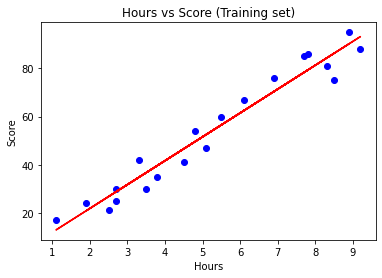

In [ ]:
#visulising the training set results
plt.scatter(x_train, y_train, color = 'blue')
plt.plot(x_train, regressor.predict(x_train), color = 'red')
plt.title('Hours vs Score (Training set)')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.show()


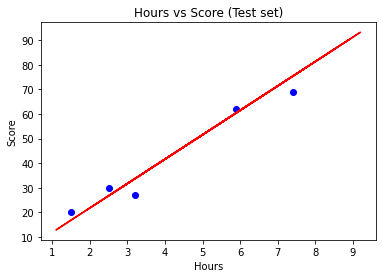

In [ ]:
#Visualising the Test set results
plt.scatter(x_test, y_test, color = 'blue')
plt.plot(x_train, regressor.predict(x_train), color = 'red')
plt.title('Hours vs Score (Test set)')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.show()

**model evaluation**

In [ ]:
#accuracy of the model 
from sklearn import metrics
metrics.r2_score(y_test,y_pred)

0.9454906892105354

**predicting error**

In [ ]:
from sklearn import metrics
print('mean absolute error:',
      metrics.mean_absolute_error(y_test,y_pred))

mean absolute error: 4.183859899002982


**predicted score if student study 9.25hr**

In [ ]:
prediction_score = regressor.predict([[9.25]])
print("predicted score for somone who study 9.25 hours :",prediction_score)
print(regressor.coef_)
print(regressor.intercept_)


predicted score for somone who study 9.25 hours : [93.69173249]
[9.91065648]
2.018160041434662
